In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data_link = "../dataset/ds_salaries.csv"
df = pd.read_csv(data_link)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [58]:
df.shape

(3755, 11)

In [61]:
df["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [4]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [8]:
numrical_features = ["work_year","salary_in_usd","salary"]
categorical_features = ["job_title","employee_residence","company_location","employment_type"]

In [14]:
corrlation_with_target = df[numrical_features].corrwith(df["salary"])
corrlation_with_target

work_year       -0.094724
salary_in_usd   -0.023676
salary           1.000000
dtype: float64

In [62]:
df[df["employment_type"]=="FT"]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [66]:
df.nlargest(5,"salary_in_usd")[['experience_level','employment_type','job_title','salary_in_usd']]

,experience_level,employment_type,job_title,salary_in_usd
3522,MI,FT,Research Scientist,450000
2011,MI,FT,Data Analyst,430967
528,SE,FT,AI Scientist,423834
3747,MI,FT,Applied Machine Learning Scientist,423000
3675,EX,CT,Principal Data Scientist,416000


In [67]:
avg_sal_by_exp=round(df.groupby('experience_level')['salary_in_usd'].mean(),2)

avg_sal_by_exp.sort_values(ascending=False)

experience_level
EX    194930.93
SE    153051.07
MI    104525.94
EN     78546.28
Name: salary_in_usd, dtype: float64

In [68]:
median_sal_by_job=round(df.groupby('job_title')['salary_in_usd'].median())
median_sal_by_job.nlargest(10)
#top 10 job titles with the highest median salaries, providing a clear view of the most lucrative roles.

job_title
Data Science Tech Lead                 375000.0
Cloud Data Architect                   250000.0
Data Lead                              212500.0
Data Analytics Lead                    211254.0
Head of Data                           202500.0
Principal Data Engineer                192500.0
Applied Scientist                      191738.0
Principal Machine Learning Engineer    190000.0
Data Science Manager                   183780.0
Data Infrastructure Engineer           183655.0
Name: salary_in_usd, dtype: float64

In [69]:
median_salary=df['salary_in_usd'].median()
df['Above Median Salary']=df['salary_in_usd'].apply(lambda x:x>median_salary) 
df.head()
#creates a new column to indicate whether each individual's salary is above this median value.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Above Median Salary
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,False
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,False
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,False
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,True
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,False


In [71]:
df["remote_ratio"].unique()

array([100,   0,  50], dtype=int64)

In [77]:
df["remote_ratio"] = df["remote_ratio"].replace({0:"onsite",100:"remote",50:"hybrid"})
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Above Median Salary
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,remote,ES,L,False
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,remote,US,S,False
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,remote,US,S,False
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,remote,CA,M,True
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,remote,CA,M,False


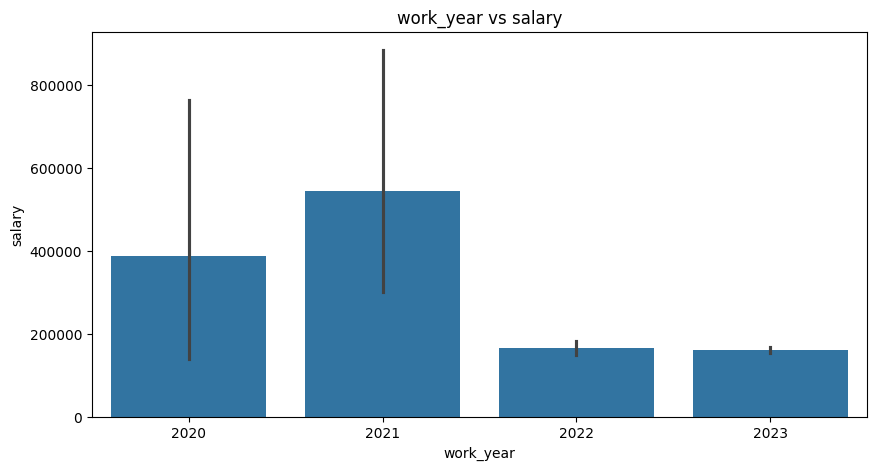

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(x="work_year",y="salary",data=df)
plt.xlabel("work_year")
plt.ylabel("salary")
plt.xticks()
plt.yticks()
plt.title("work_year vs salary")
plt.show()

Text(0, 0.5, 'Frequency')

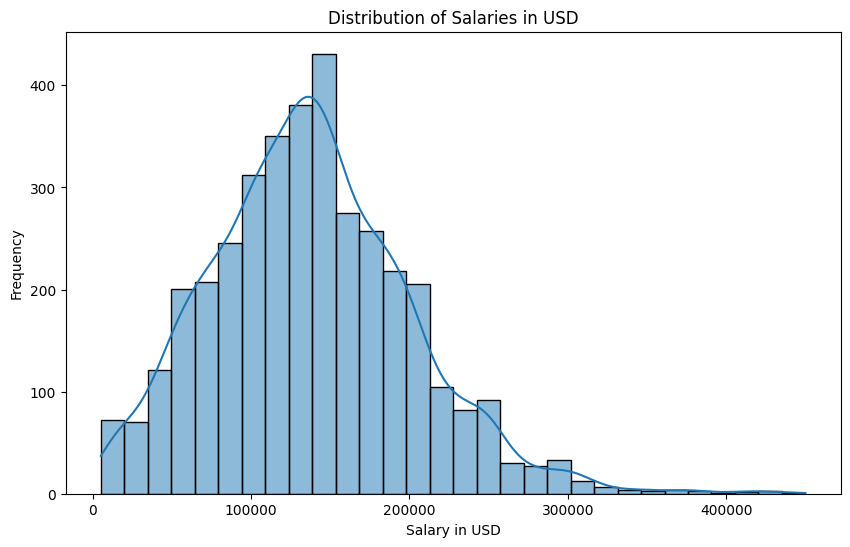

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(x='salary_in_usd',data=df,bins=30,kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

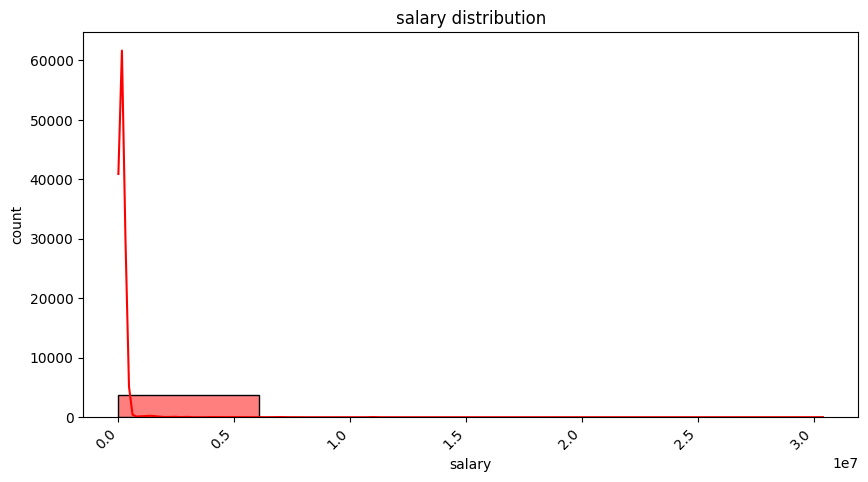

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(x = "salary", data = df ,kde=True,bins=5,color="red",alpha=0.5)
plt.xlabel("salary")
plt.xticks( rotation=45, ha='right',fontsize=10,fontweight='light') 
plt.ylabel("count")
plt.title("salary distribution")
plt.show()


C:\Users\Shehryar Mirza\AppData\Local\Temp\ipykernel_21020\4017467145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level',y='salary_in_usd',data=df,palette=palette)


Text(0, 0.5, 'Salary in USD')

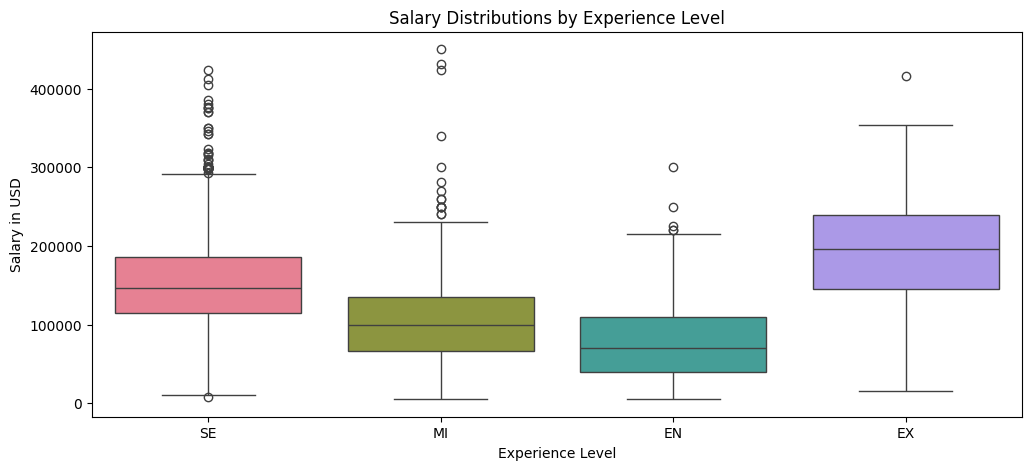

In [99]:
plt.figure(figsize=(12,5))
palette = sns.color_palette("husl", df['experience_level'].nunique())
sns.boxplot(x='experience_level',y='salary_in_usd',data=df,palette=palette) 
plt.title('Salary Distributions by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

C:\Users\Shehryar Mirza\AppData\Local\Temp\ipykernel_21020\349573491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_salaries.values, y=top_10_salaries.index,  palette='viridis')


Text(0, 0.5, 'Job Title')

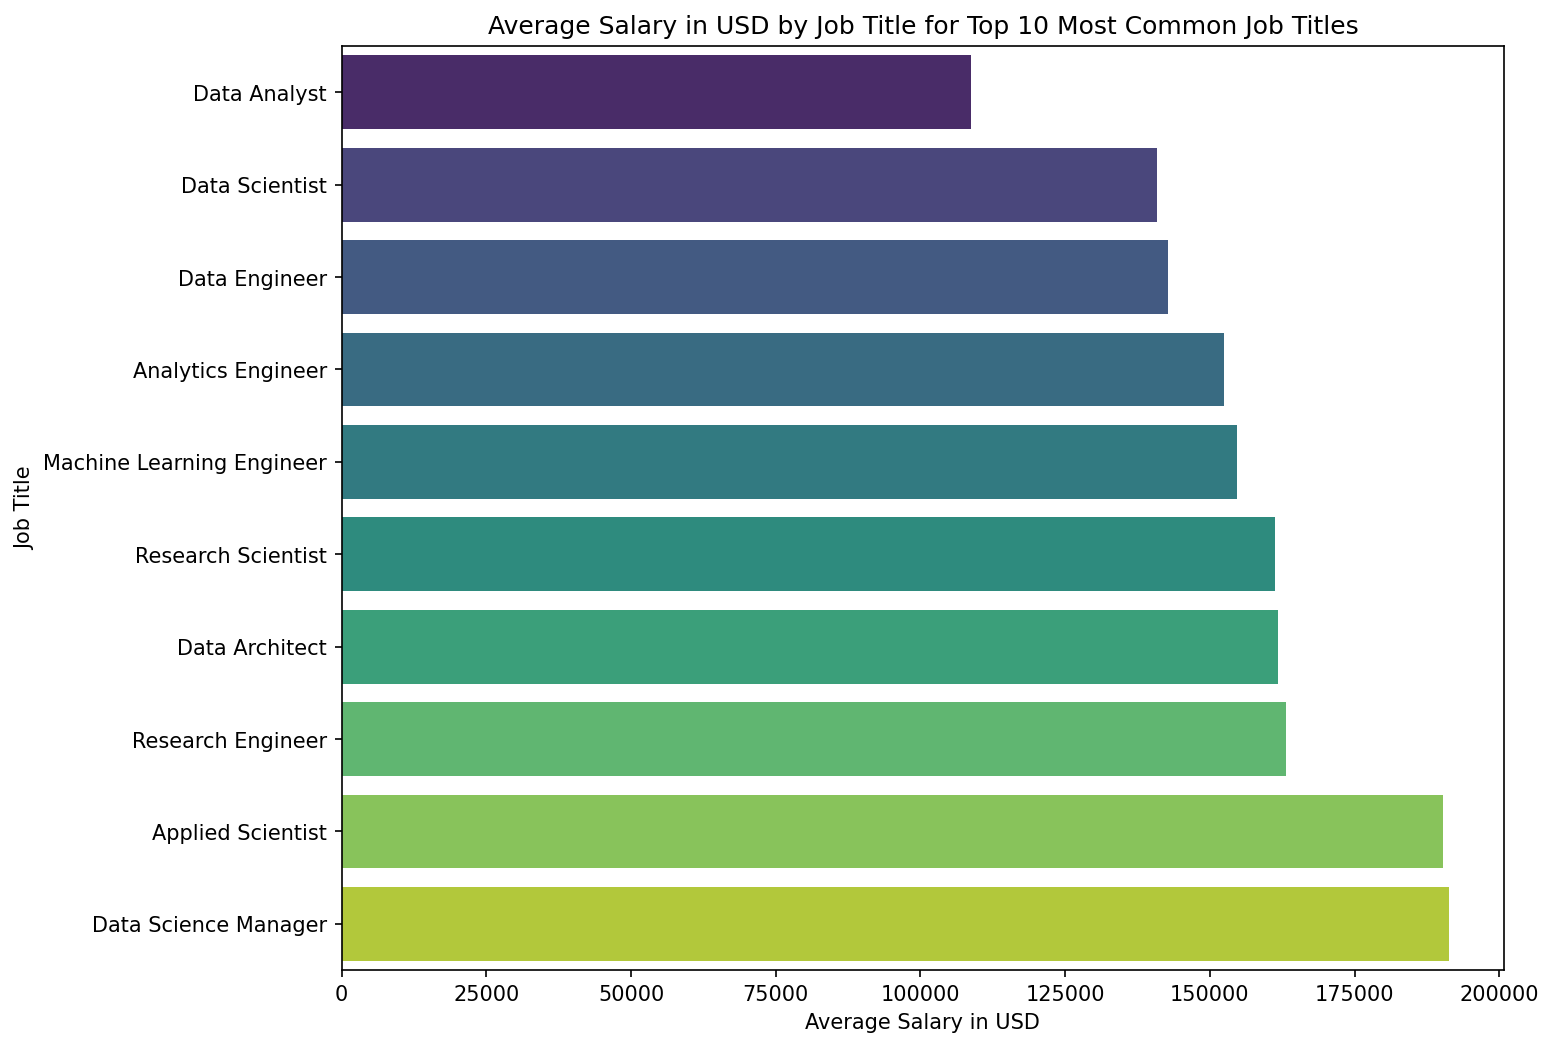

In [100]:

top_10_titles = df['job_title'].value_counts().head(10).index
top_10_salaries = df[df['job_title'].isin(top_10_titles)].groupby('job_title')['salary_in_usd'].mean().sort_values()
plt.figure(figsize=(10, 8),dpi=150)
sns.barplot(x=top_10_salaries.values, y=top_10_salaries.index,  palette='viridis')
plt.title('Average Salary in USD by Job Title for Top 10 Most Common Job Titles')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')

In [35]:
df["salary_currency"].unique()


array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [38]:
clp = df["salary_currency"]=="CLP"
clp = df[clp]==True
clp 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3669,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df["employment_type"].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

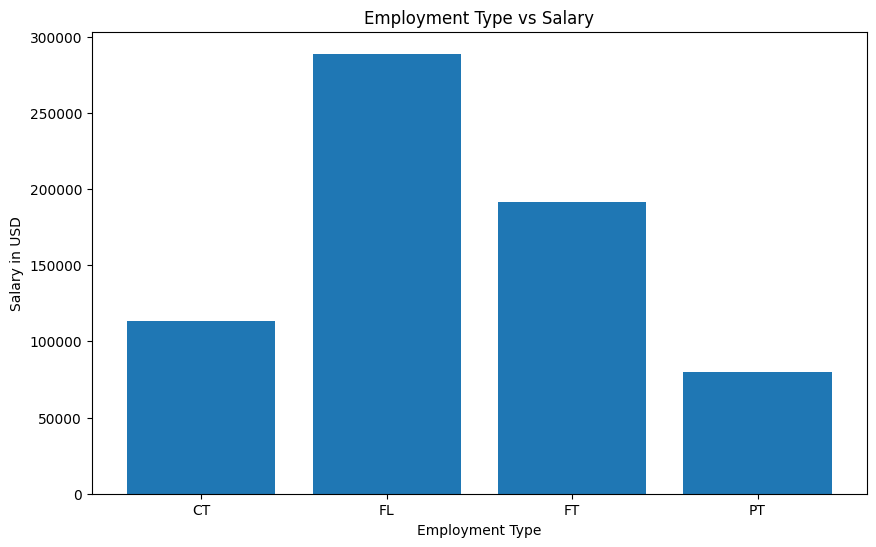

In [55]:
mean_salary = df.groupby('employment_type')['salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_salary['employment_type'], mean_salary['salary'])
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.title('Employment Type vs Salary')
plt.show()

